# Tercera Actividad: Estructurando proyecto DS I: 

- **Data source**: [Cantidad de ambulancias, camas y salas (consideradas trazadoras) por departamento, año y naturaleza jurídica para servicios habilitados](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Cantidad-de-ambulancias-camas-y-salas-consideradas/fa2g-cdft/about_data)

- **Introducción**: En un país en constante crecimiento como Colombia, la capacidad del sistema de salud para satisfacer las necesidades de su población es un tema de vital importancia. Este proyecto se centra en analizar la disponibilidad de salas y camas en hospitales, un aspecto crucial para evaluar si la infraestructura sanitaria está preparada para responder a las exigencias actuales. A través del análisis de un conjunto de datos relevante, se investigarán no solo la evolución de los servicios médicos, sino también la suficiencia de unidades críticas como las de cuidado intensivo y quirófanos. Finalmente, se buscará responder una pregunta fundamental: ¿Está el sistema de salud colombiano lo suficientemente desarrollado para enfrentar los desafíos del país?

- **Objetivo principal**: El objetivo principal de esta entrega es la interpretación y el mejoramiento de las visualizaciones de datos para el correcto desarrollo de hípotesis y preguntas de interés.

- **Palabras clave**: 
Disparidad médica, distribución de recursos, infraestructura médica, salas de quirófano, Salas de parto, cuidados intensivos, departamentos desatendidos, emergencias médicas, capacidad hospitalaria, acceso a la salud, riesgo crítico, reducción de, instalaciones, vulnerabilidad regional, Registro de datos médicos, intervención urgente, recursos médicos, desigualdad sanitaria, atención médica esencial, equilibrio de recursos y Colombia salud pública.

# 0. Librerias

In [2]:
import pandas as pd
import matplotlib as mtl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Extracción de datos

In [3]:
ruta = r'C:\Users\USER\OneDrive\Escritorio\ActividadesBIT\Actividad_3'
df = pd.read_csv(ruta + '\\' + 'Cantidad_de_ambulancias__camas_y_salas__consideradas_trazadoras__por_departamento__a_o_y_naturaleza_jur_dica_para_servicios_habilitados_20240805.csv', sep = ',', encoding = 'utf-8')
df

,Departamento,Año,Naturaleza jurídica,AMBULANCIAS Básica,AMBULANCIAS Medicalizada,CAMAS Adultos,CAMAS Cuidado Agudo Mental,CAMAS Cuidado Intensivo Adulto,CAMAS Cuidado Intensivo Neonatal,CAMAS Cuidado Intensivo Pediátrico,...,CAMAS Cuidado Intermedio Neonatal,CAMAS Cuidado Intermedio Pediátrico,CAMAS Farmacodependencia,CAMAS Obstetricia,CAMAS Pediátrica,CAMAS Psiquiatría,CAMAS Unidad de Quemados Adulto,CAMAS Unidad de Quemados Pediátrico,SALAS Partos,SALAS Quirófano
0,Amazonas,2017.0,Privada,0,0,41,0,0,0,0,...,0,0,0,2,7,0,0,0,0,1
1,Amazonas,2017.0,Pública,3,0,27,0,0,0,0,...,0,3,0,21,28,0,0,0,4,2
2,Amazonas,2018.0,Privada,0,0,41,0,0,0,0,...,0,0,30,2,7,0,0,0,0,1
3,Amazonas,2018.0,Pública,3,0,27,0,0,0,0,...,0,3,0,21,28,0,0,0,8,2
4,Amazonas,2019.0,Privada,0,0,41,0,0,0,0,...,0,0,30,2,7,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Valle del cauca,2022.0,Pública,133,9,491,0,45,0,0,...,0,0,0,0,168,0,0,0,44,0
374,Vaupés,2022.0,Privada,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,Vaupés,2022.0,Pública,2,0,14,0,0,0,0,...,0,0,0,1,8,0,0,0,3,0
376,Vichada,2022.0,Privada,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Primero exploro la cantidad de rows y columns con la que voy a trabajar.
print(df.shape)
#Después reviso la información de los datos dentro del dataframe.
print(df.info)

(378, 22)
<bound method DataFrame.info of         Departamento     Año Naturaleza jurídica  AMBULANCIAS Básica  \
0           Amazonas  2017.0             Privada                   0   
1           Amazonas  2017.0             Pública                   3   
2           Amazonas  2018.0             Privada                   0   
3           Amazonas  2018.0             Pública                   3   
4           Amazonas  2019.0             Privada                   0   
..               ...     ...                 ...                 ...   
373  Valle del cauca  2022.0             Pública                 133   
374           Vaupés  2022.0             Privada                   1   
375           Vaupés  2022.0             Pública                   2   
376          Vichada  2022.0             Privada                   0   
377          Vichada  2022.0             Pública                  10   

     AMBULANCIAS Medicalizada  CAMAS Adultos  CAMAS Cuidado Agudo Mental  \
0                

In [5]:
#Reviso los departamentos y la cantidad para hacer las gráficas.
Headers = df['Departamento'].unique()
print(Headers)
len(Headers)


['Amazonas' 'Antioquia' 'Arauca' 'Atlántico' 'Bogotá D.C' 'Bolívar'
 'Boyacá' 'Caldas' 'Caquetá' 'Casanare' 'Cauca' 'Cesar' 'Chocó' 'Córdoba'
 'Cundinamarca' 'Guainía' 'Guaviare' 'Huila' 'La Guajira' 'Magdalena'
 'Meta' 'Nariño' 'Norte de Santander' 'Putumayo' 'Quindío' 'Risaralda'
 'San Andrés y Providencia' 'Santander' 'Sucre' 'Tolima' 'Valle del cauca'
 'Vaupés' 'Vichada' 'Total general' 'Barranquilla' 'Buenaventura' 'Cali'
 'Cartagena' 'Santa Marta']


39

# 2. Preguntas de interés 
- ¿Cuál es el tipo de naturaleza jurídica predominante en los hospitales de Colombia según los datos analizados?

- ¿Cómo han evolucionado los servicios médicos en Colombia a lo largo del tiempo según los datos disponibles?

- ¿Los datos analizados indican si Colombia cuenta con suficientes unidades de cuidado intensivo?

- ¿Los datos sugieren que la cantidad de salas de quirófano y de parto en Colombia es adecuada?

- ¿Con base en los resultados obtenidos, se puede considerar que el sistema de salud colombiano está lo suficientemente desarrollado para satisfacer las demandas del país?


# 3. Primer Análisis: **Hospitales por departamento**

Naturaleza jurídica       Mixta  Privada  Pública
Departamento                                     
Amazonas                      0        5        5
Antioquia                     5        5        5
Arauca                        0        5        5
Atlántico                     2        5        5
Barranquilla                  1        1        1
Bogotá D.C                    1        5        5
Bolívar                       0        5        5
Boyacá                        0        5        5
Buenaventura                  0        1        1
Caldas                        5        5        5
Cali                          1        1        1
Caquetá                       0        5        5
Cartagena                     1        1        1
Casanare                      5        5        5
Cauca                         0        5        5
Cesar                         0        5        5
Chocó                         4        5        5
Cundinamarca                  1        5        5


<Figure size 1600x1000 with 0 Axes>

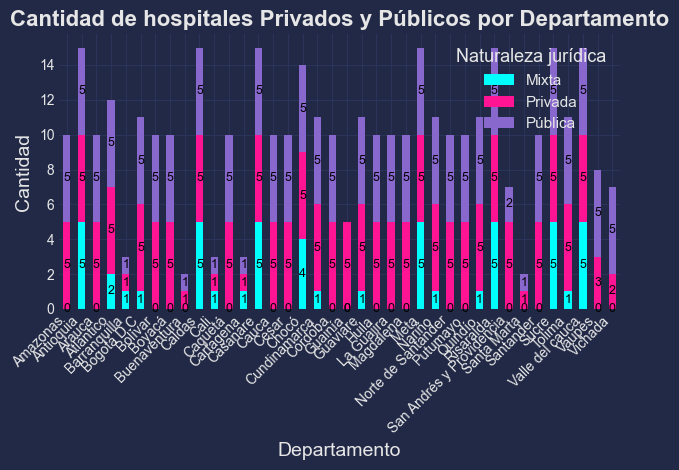

Naturaleza jurídica
Mixta       50
Privada    165
Pública    162
dtype: int64


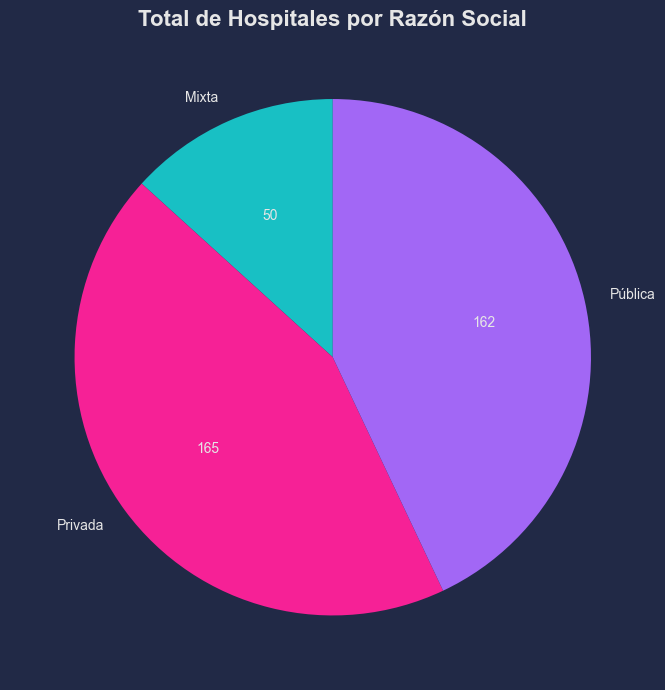

In [45]:
#Elegimos un estilo
mtl.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
#A continuación voy a filtrar el dataset para excluir 'Total general'
df_filtered = df[df['Departamento'] != 'Total general']

# Contar el número de hospitales por tipo de 'Naturaleza jurídica' en cada departamento
conteo_por_departamento = df_filtered.groupby(['Departamento', 'Naturaleza jurídica']).size().unstack(fill_value=0)

# Mostrar el conteo
print(conteo_por_departamento)

# Graficar los resultados - bar
plt.figure(figsize=(16, 10))
conteo_por_departamento.plot(kind='bar', stacked=True, color=['cyan', '#FF1493', '#8968cd'])
#Ajuste de títulos y etiquetas
plt.title('Cantidad de hospitales Privados y Públicos por Departamento', fontsize=16, fontweight='bold')
plt.xlabel('Departamento', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.legend(title='Naturaleza jurídica', title_fontsize='13', fontsize='11', loc='upper right')
plt.xticks(rotation=45, ha='right', fontsize=10)
#Se agregan etiquetas en las barras
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='center', fontsize=9, color='black')
#Ajuste del diseño
plt.tight_layout()
#Mostrar gráfica
plt.show()

#Contar el número de hospitales por naturaleza jurídica
total_por_categoria = conteo_por_departamento.sum()

#imprime este otro conteo
print(total_por_categoria)

#Graficar los resultados - pie
fig, ax = plt.subplots(figsize=(10,7))
ax.pie(total_por_categoria, labels= total_por_categoria.index,  autopct=lambda p: '{:.0f}'.format(p * sum(total_por_categoria) / 100), startangle=90)
plt.title('Total de Hospitales por Razón Social', fontsize=16, fontweight='bold')
#Ajustar diseño
plt.tight_layout()
#Mostrar
plt.show()

In [ ]:
# Exporto la gráfica como recomendación del profesor.
plt.savefig('num_hopitales.png', dpi = 130)

<Figure size 640x480 with 0 Axes>

Naturaleza jurídica  Mixta  Privada  Pública
Año                                         
2017.0                   8       31       31
2018.0                   8       31       31
2019.0                   9       32       31
2020.0                   9       33       32
2022.0                  16       38       37


<Figure size 1600x1000 with 0 Axes>

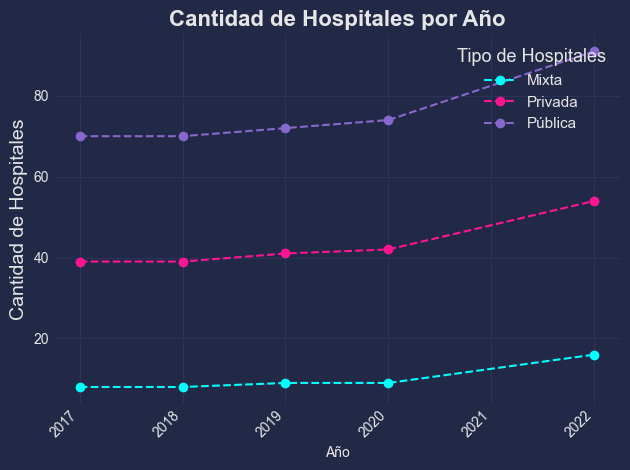

In [35]:
# Elegimos un estilo
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Suma la cantidad de hospitales por año
hospitales_año = df_filtered.groupby(['Año', 'Naturaleza jurídica']).size().unstack(fill_value=0)

# Se imprime la variable
print(hospitales_año)

# Se grafica esta información
plt.figure(figsize=(16, 10))
hospitales_año.plot(kind='line', marker='o', stacked=True,linestyle= '--', color=['cyan', '#FF1493', '#8968cd'])
plt.title('Cantidad de Hospitales por Año', fontsize=16, fontweight='bold')
plt.xlabel('Año')
plt.ylabel('Cantidad de Hospitales', fontsize=14)
plt.legend(title='Tipo de Hospitales', title_fontsize='13', fontsize=11, loc='upper right')
#Rotación de las etiquetas
plt.xticks(rotation=45, ha='right', fontsize=10)
#Ajustar el diseño
plt.tight_layout()
#Mostrar la gráfica
plt.show()



En un primer análisis, observamos que tanto los hospitales públicos como los privados tienen una representación significativa en la mayoría de los departamentos de Colombia, mientras que los hospitales mixtos son los menos comunes. En total, se registran 377 hospitales en todo el país, con una ligera predominancia de hospitales privados sobre los públicos. Sin embargo, esta diferencia es mínima, lo que sugiere una distribución relativamente equilibrada entre los dos tipos principales de hospitales.

# 4. Segundo Análisis: **Ambulancias disponibles**

En esta categoría, los hospitales cuentan con dos tipos de ambulancias, la básica y la medicalizada.
La básica es una unidad de intervención con equipo específico de respuesta inicial, la cual es tripulada por auxiliar de enfermería y técnico o tecnólogo en atención prehospitalaria.
Por otra parte, la medicalizada es una unidad de intervención con equipo avanzado, tripulado por médico entrenado, enfermera o tecnólogo en atención prehospitalaria.

**Referencia**
[Dotación De Ambulancias; Transporte Asistencial Básico Y Medicalizado - Versión 2.0](https://proyectostipo.dnp.gov.co/images/pdf/ambulancias/PTambulancias.pdf)

                          AMBULANCIAS Básica  AMBULANCIAS Medicalizada
Departamento                                                          
Amazonas                                  10                         0
Antioquia                               2667                       558
Arauca                                   232                        54
Atlántico                                839                       299
Barranquilla                              93                        47
Bogotá D.C                              2712                      1077
Bolívar                                  727                       280
Boyacá                                  1096                       153
Buenaventura                              10                         8
Caldas                                   688                       114
Cali                                     342                        57
Caquetá                                  301                        71
Cartag

<Figure size 1600x1000 with 0 Axes>

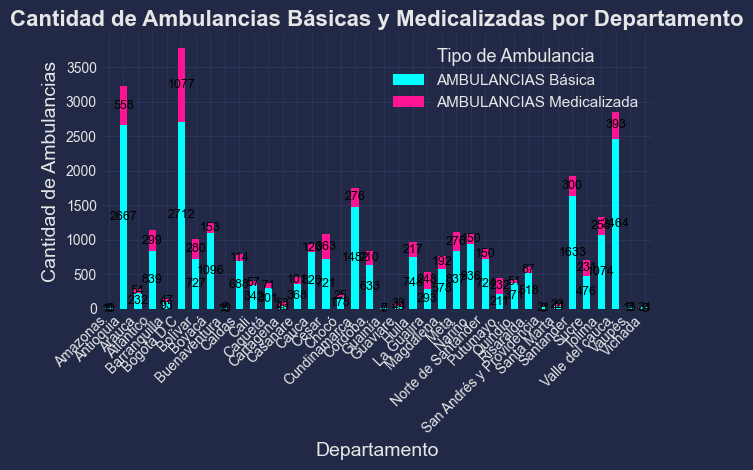

        AMBULANCIAS Básica  AMBULANCIAS Medicalizada
Año                                                 
2017.0                4626                      1181
2018.0                4767                      1258
2019.0                4983                      1291
2020.0                5181                      1397
2022.0                5436                      1582


<Figure size 1600x1000 with 0 Axes>

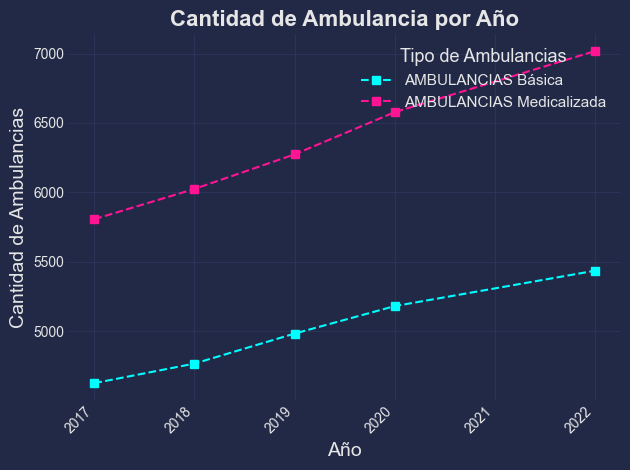

In [38]:
#Elegimos un estilo
mtl.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
#A continuación voy a filtrar el dataset para excluir 'Total general'
df_filtered = df[df['Departamento'] != 'Total general']
# Sumamos el número de ambulancias por tipo en cada departamento
suma_ambulancias = df_filtered.groupby('Departamento')[['AMBULANCIAS Básica', 'AMBULANCIAS Medicalizada']].sum()

# Se muestra el conteo para darme una idea y poder graficar la información.
print(suma_ambulancias)

# Se grafican los resultados
plt.figure(figsize=(16, 10))
suma_ambulancias.plot(kind='bar', stacked=True, color=['cyan', '#FF1493'])
#Se configuran los labels y los títulos
plt.title('Cantidad de Ambulancias Básicas y Medicalizadas por Departamento', fontsize=16, fontweight='bold')
plt.xlabel('Departamento', fontsize=14)
plt.ylabel('Cantidad de Ambulancias', fontsize=14)
plt.legend(title='Tipo de Ambulancia', title_fontsize='13', fontsize='11', loc='upper right')
plt.xticks(rotation=45, ha='right', fontsize=10)
#Agregar etiquetas a las barras
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='center', fontsize=9, color='black')
#Ajuste de diseño
plt.tight_layout()
#mostrar 
plt.show()

#Se suma la cantidad de ambulancias por año
ambulancias_año = df_filtered.groupby('Año')[['AMBULANCIAS Básica', 'AMBULANCIAS Medicalizada']].sum()
#Se imprime la variable
print(ambulancias_año)
#Se grafica esta información
plt.figure(figsize=(16, 10))
ambulancias_año.plot(kind='line', stacked=True, marker='s', linestyle='--',color=['cyan', '#FF1493'])
plt.title('Cantidad de Ambulancia por Año', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de Ambulancias', fontsize=14)
plt.legend(title='Tipo de Ambulancias', title_fontsize='13', fontsize='11', loc='upper right')
#Rotación de las etiquetas
plt.xticks(rotation=45, ha='right', fontsize=10)
#Ajuste de diseño
plt.tight_layout()
#mostrar
plt.show()


In [ ]:
# Exporto la gráfica como recomendación del profesor.
plt.savefig('ambulancia_departamento.png', dpi = 130)

<Figure size 640x480 with 0 Axes>

Es preocupante observar que algunos departamentos, como Buenaventura, Guainía, San Andrés y Providencia, y Vaupés, tienen una alarmante escasez de ambulancias de ambos tipos. Esta situación podría llevar a serias complicaciones en casos de emergencias, donde se requiera atención inicial o el transporte de heridos graves. Es crucial que se haga un llamado de atención a estos departamentos y se dé visibilidad a esta problemática. Por otro lado, Bogotá se destaca por tener la mayor cantidad de ambulancias, especialmente ambulancias medicalizadas. Además, es importante señalar que, en términos generales, ha habido un aumento en la cantidad de ambulancias a lo largo del tiempo.

# 5. Tercer Análisis: **Camas de cuidado intensivo disponibles**

En esta categoría se tiene en cuenta que se analizaran tres tipos de camas de cuidado intensivo para urgencias diferentes, se tomarán en cuenta las UCI para neonatos, pediatría y para adultos. Teniendo en cuenta que la cama es equivalente a un 'cupo' para que un paciente pueda ser tratado. 

                          CAMAS Cuidado Intensivo Adulto  \
Departamento                                               
Amazonas                                               0   
Antioquia                                           2370   
Arauca                                                16   
Atlántico                                           2052   
Barranquilla                                         140   
Bogotá D.C                                          4134   
Bolívar                                              955   
Boyacá                                               321   
Buenaventura                                           0   
Caldas                                               522   
Cali                                                  80   
Caquetá                                               80   
Cartagena                                             32   
Casanare                                              77   
Cauca                                   

<Figure size 1600x1000 with 0 Axes>

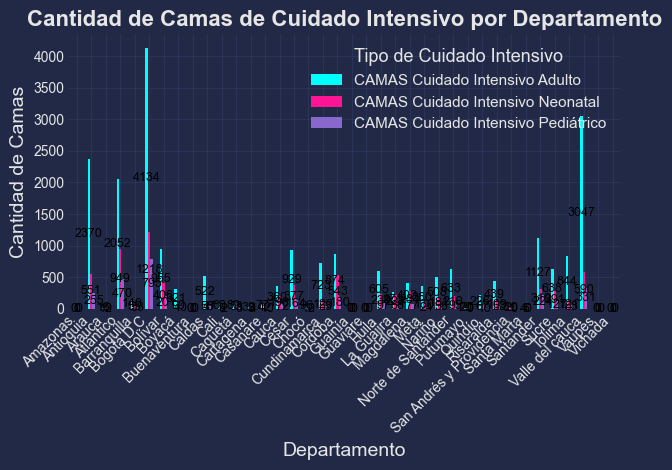

        CAMAS Cuidado Intensivo Adulto  CAMAS Cuidado Intensivo Neonatal  \
Año                                                                        
2017.0                            5226                              1844   
2018.0                            5194                              1824   
2019.0                            5346                              1841   
2020.0                            6149                              1743   
2022.0                            1001                               256   

        CAMAS Cuidado Intensivo Pediátrico  
Año                                         
2017.0                                 850  
2018.0                                 847  
2019.0                                 906  
2020.0                                 795  
2022.0                                 171  


<Figure size 1600x1000 with 0 Axes>

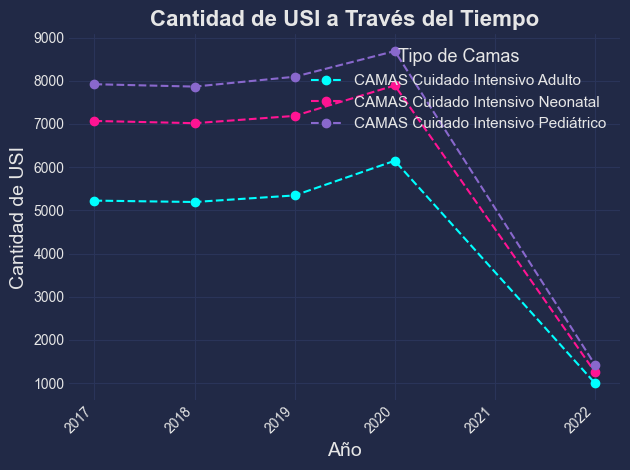

In [43]:
#Elegimos un estilo
mtl.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

df_filtered = df[df['Departamento'] != 'Total general']

# Sumamos el número de camas por tipo de cuidado intensivo en cada departamento
suma_camas = df_filtered.groupby('Departamento')[['CAMAS Cuidado Intensivo Adulto', 'CAMAS Cuidado Intensivo Neonatal', 'CAMAS Cuidado Intensivo Pediátrico']].sum()

# Mostrar el conteo
print(suma_camas)

# Graficar los resultados
plt.figure(figsize=(16, 10))
suma_camas.plot(kind='bar', stacked=False, color=['cyan', '#FF1493', '#8968cd'])
plt.title('Cantidad de Camas de Cuidado Intensivo por Departamento', fontsize=16, fontweight='bold')
plt.xlabel('Departamento', fontsize=14)
plt.ylabel('Cantidad de Camas', fontsize=14)
plt.legend(title='Tipo de Cuidado Intensivo', title_fontsize='13', fontsize='11', loc='upper right')
plt.xticks(rotation=45, ha='right', fontsize=10)
#agregar etiquetas en las barras
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='center', fontsize=9, color='black')
#Ajustar estilo
plt.tight_layout()
#Mostrar
plt.show()

#Se calcula la cantidad de USI por cada año
plt.figure(figsize=(16, 10))
camas_intensivo_año = df_filtered.groupby('Año')[['CAMAS Cuidado Intensivo Adulto', 'CAMAS Cuidado Intensivo Neonatal', 'CAMAS Cuidado Intensivo Pediátrico']].sum()
#Se imprime la variable
print(camas_intensivo_año)
#Graficamos esta información
camas_intensivo_año.plot(kind='line', stacked=True, marker='o', linestyle='--', color=['cyan', '#FF1493', '#8968cd'])
plt.title('Cantidad de USI a Través del Tiempo', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de USI', fontsize=14)
plt.legend(title='Tipo de Camas', title_fontsize='13', fontsize='11', loc='upper right')
#Rotacion etiquetas x
plt.xticks(rotation=45, ha='right', fontsize=10)
#Ajustar estilo
plt.tight_layout()
#Mostrar
plt.show()

CAMAS Cuidado Intensivo Adulto        22916
CAMAS Cuidado Intensivo Neonatal       7508
CAMAS Cuidado Intensivo Pediátrico     3569
dtype: int64


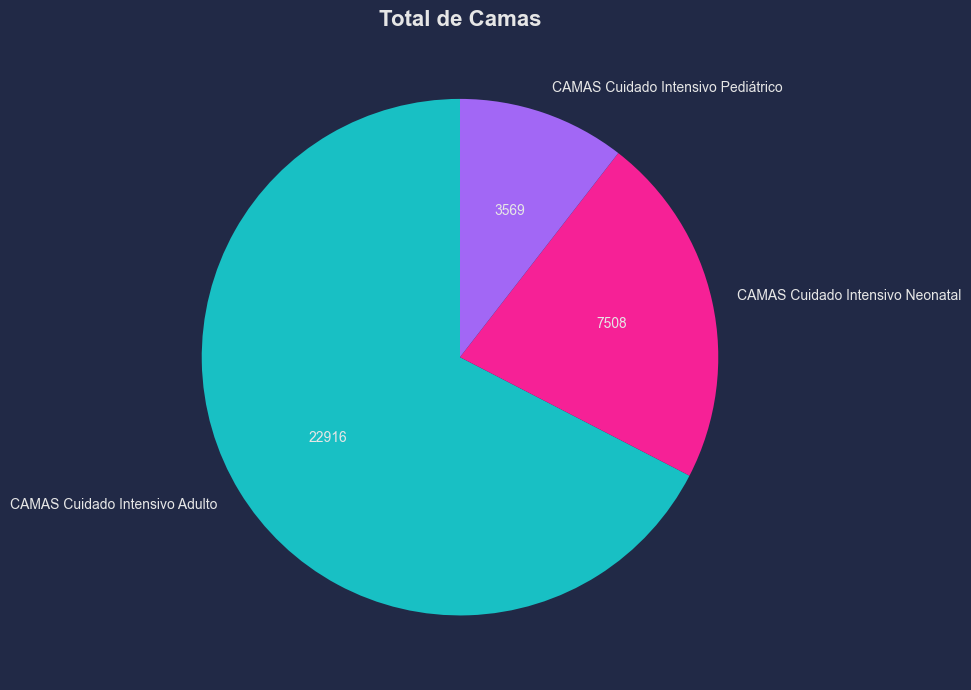

In [46]:
#Se calcula el total por tipo de cama
total_por_USI = df_filtered[['CAMAS Cuidado Intensivo Adulto', 'CAMAS Cuidado Intensivo Neonatal', 'CAMAS Cuidado Intensivo Pediátrico']].sum()
#Se imprime la varible
print(total_por_USI)
#Se grafica el pie
fig, ax=plt.subplots(figsize=(10, 7))
ax.pie(total_por_USI,labels=total_por_USI.index, autopct=lambda p: '{:.0f}'.format(p * sum(total_por_USI) / 100), startangle=90)
plt.title('Total de Camas', fontsize=16, fontweight='bold')
#Ajustar diseño
plt.tight_layout()
#Mostrar
plt.show()

In [ ]:
# Exporto la gráfica como recomendación del profesor.
plt.savefig('USI_departamento.png', dpi = 130)

<Figure size 640x480 with 0 Axes>

Se evidencia una situación alarmante en algunos departamentos, como Amazonas, Buenaventura, Guainía, Vaupés y Vichada, donde no se registra ninguna cama para cuidados intensivos. Esta carencia es preocupante y subraya la necesidad urgente de visibilizar y abordar esta problemática.

En contraste, los departamentos con la mayor cantidad de camas en esta categoría son Bogotá, Antioquia y Valle del Cauca. Sin embargo, un dato preocupante es que, con el tiempo, la cantidad de camas ha disminuido. En futuras entregas, investigaré y comunicaré las razones detrás de esta tendencia.

# 6. Cuarto Análisis: **Cuidado Mental**

                          CAMAS Cuidado Agudo Mental  CAMAS Psiquiatría
Departamento                                                           
Amazonas                                           0                  0
Antioquia                                        112               2013
Arauca                                             0                  0
Atlántico                                        184               2586
Barranquilla                                       0                 30
Bogotá D.C                                       210               4261
Bolívar                                          152               1488
Boyacá                                           168                 20
Buenaventura                                       0                  0
Caldas                                           104                616
Cali                                               0                 42
Caquetá                                           40            

<Figure size 1600x1000 with 0 Axes>

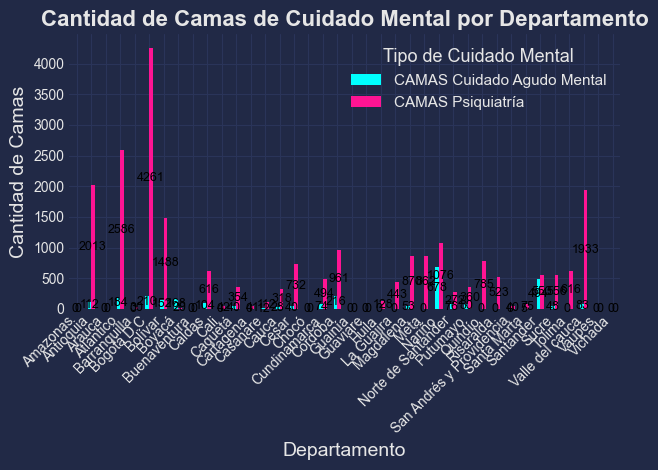

        CAMAS Cuidado Agudo Mental  CAMAS Psiquiatría
Año                                                  
2017.0                         867               6802
2018.0                         751               5775
2019.0                         687               5366
2020.0                         547               4901
2022.0                           5                316


<Figure size 1600x1000 with 0 Axes>

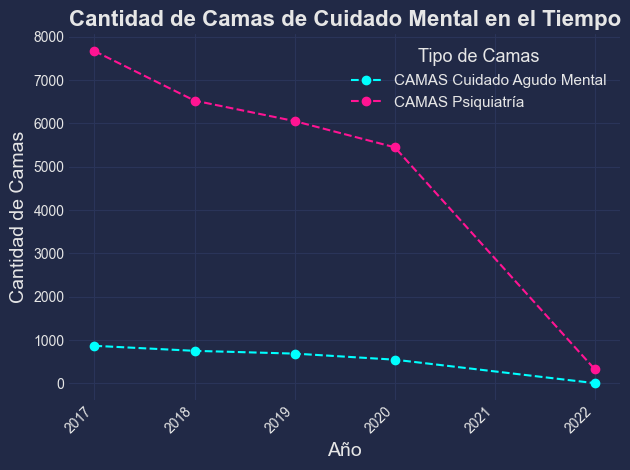

In [50]:
#Elegimos un estilo
mtl.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

df_filtered = df[df['Departamento'] != 'Total general']

# Sumamos el número de camas por tipo de cuidado intensivo en cada departamento
suma_camas = df_filtered.groupby('Departamento')[['CAMAS Cuidado Agudo Mental', 'CAMAS Psiquiatría']].sum()

# Mostrar el conteo
print(suma_camas)

# Graficar los resultados
plt.figure(figsize=(16, 10))
suma_camas.plot(kind='bar', stacked=False, color=['cyan', '#FF1493'])
#título y etiquetas
plt.title('Cantidad de Camas de Cuidado Mental por Departamento', fontsize=16, fontweight='bold')
plt.xlabel('Departamento', fontsize=14)
plt.ylabel('Cantidad de Camas', fontsize=14)
plt.legend(title='Tipo de Cuidado Mental', title_fontsize='13', fontsize='11', loc='upper right')
plt.xticks(rotation=45, ha='right', fontsize=10)
#Etiquetas en las barras
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='center', fontsize=9, color='black')
#Ajustar diseño
plt.tight_layout()
#mostrar
plt.show()

#Total de salas de cuidado mental 
suma_salas_mental= df_filtered.groupby('Año')[['CAMAS Cuidado Agudo Mental', 'CAMAS Psiquiatría']].sum()
#Se imprime la variable
print(suma_salas_mental)
#Se grafica esta información
plt.figure(figsize=(16, 10))
suma_salas_mental.plot(kind='line', stacked=True, marker='o', linestyle='--', color=['cyan', '#FF1493'])
plt.title('Cantidad de Camas de Cuidado Mental en el Tiempo', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de Camas', fontsize=14)
plt.legend(title='Tipo de Camas', title_fontsize='13', fontsize='11', loc='upper right')
#Rotación etiquetas x
plt.xticks(rotation=45, ha='right', fontsize=10)
#Ajustar diseño
plt.tight_layout()
#mostrar
plt.show()

In [ ]:
# Exporto la gráfica como recomendación del profesor.
plt.savefig('CuidadoMental_departamento.png', dpi = 150)
plt.show()

<Figure size 640x480 with 0 Axes>

CAMAS Cuidado Agudo Mental     2857
CAMAS Psiquiatría             23160
dtype: int64


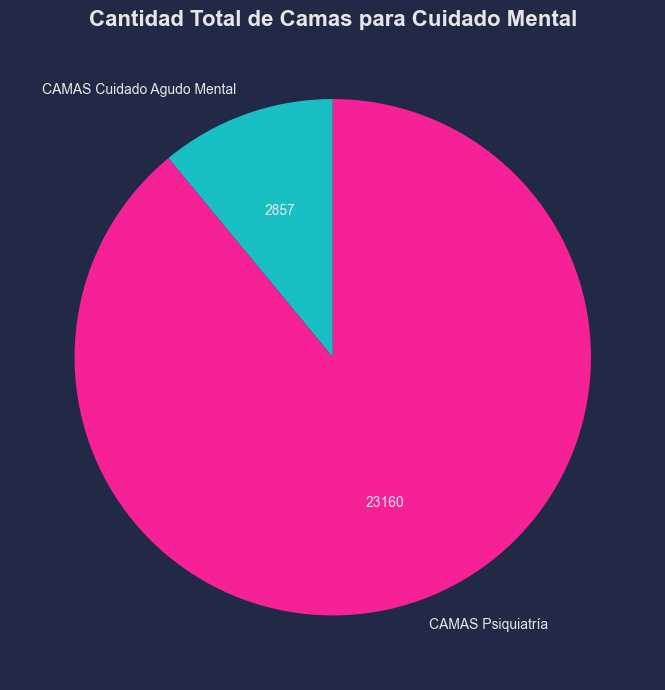

In [51]:
#Se suman la cantidad total de camas
total_camas_mental = suma_camas.sum()
#Se imprime la variable
print(total_camas_mental)
#Se grafica
fig, ax=plt.subplots(figsize=(10, 7))
ax.pie(total_camas_mental, labels=total_camas_mental.index,  autopct=lambda p: '{:.0f}'.format(p * sum(total_camas_mental) / 100), startangle=90)
plt.title('Cantidad Total de Camas para Cuidado Mental', fontsize=16, fontweight='bold')
#Ajustar diseño
plt.tight_layout()
#mostrar
plt.show()


Contrario a lo que esperaba, hay una gran cantidad de camas disponibles para el cuidado psiquiátrico. Sin embargo, persiste un patrón preocupante en algunos de los departamentos mencionados anteriormente, que parecen carecer de camas especializadas para cualquier tipo de circunstancia grave o de cuidado especial.

Además, se ha observado un decremento en la cantidad de salas registradas a lo largo del tiempo. Aún necesito el asesoramiento de mi equipo de revisión para confirmar esta tendencia, pero la hipótesis preliminar es que no se han podido registrar todas las camas en este dataset.

# 7. Quinto Análisis: **Sala de quirófano y de parto**

                          SALAS Partos  SALAS Quirófano
Departamento                                           
Amazonas                            38               14
Antioquia                          770             1707
Arauca                              35               53
Atlántico                          257             1106
Barranquilla                        30               49
Bogotá D.C                         294             2644
Bolívar                            247              446
Boyacá                             186              237
Buenaventura                         4                4
Caldas                             193              258
Cali                                23               19
Caquetá                            109               52
Cartagena                           12                6
Casanare                           112               62
Cauca                              281              161
Cesar                              221          

<Figure size 1600x1000 with 0 Axes>

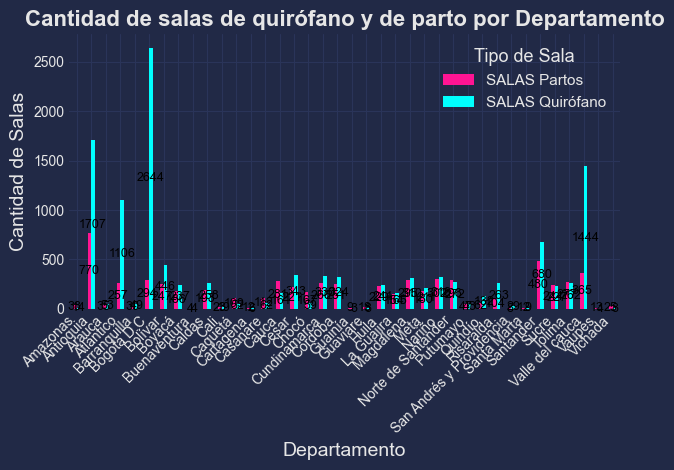

        SALAS Partos  SALAS Quirófano
Año                                  
2017.0          1306             2971
2018.0          1334             2996
2019.0          1350             3069
2020.0          1357             3080
2022.0          1269              392


<Figure size 1600x1000 with 0 Axes>

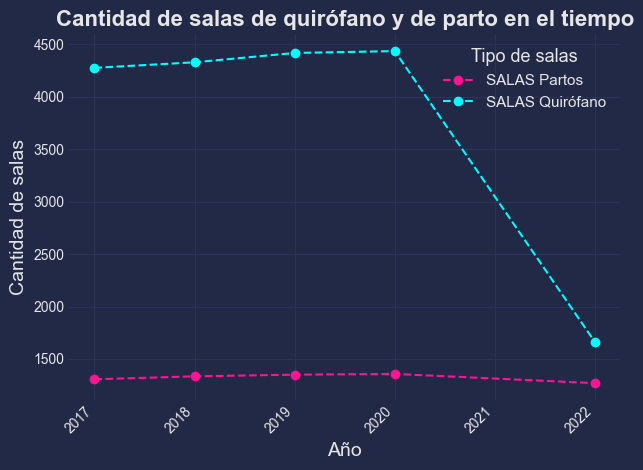

In [52]:
#Elegimos un estilo
mtl.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

df_filtered = df[df['Departamento'] != 'Total general']

# Sumamos el número de camas por tipo de cuidado intensivo en cada departamento
suma_salas = df_filtered.groupby('Departamento')[['SALAS Partos', 'SALAS Quirófano']].sum()

# Mostrar el conteo
print(suma_salas)

# Graficar los resultados
plt.figure(figsize=(16, 10))
suma_salas.plot(kind='bar', stacked=False, color=['#FF1493', 'cyan'])
plt.title('Cantidad de salas de quirófano y de parto por Departamento', fontsize=16, fontweight='bold')
plt.xlabel('Departamento', fontsize=14)
plt.ylabel('Cantidad de Salas', fontsize=14)
plt.legend(title='Tipo de Sala', title_fontsize='13', fontsize='11', loc='upper right')
plt.xticks(rotation=45, ha='right', fontsize=10)
#Etiquetas en las barras
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='center', fontsize=9, color='black')
plt.tight_layout()
plt.show()

#Se suman las variabe por año
total_salas_año = df_filtered.groupby('Año')[['SALAS Partos', 'SALAS Quirófano']].sum()
#Se imprime la variable
print(total_salas_año)
#Se grafica la la información anterior
plt.figure(figsize=(16, 10))
total_salas_año.plot(kind='line', stacked=True, marker='o', linestyle='--', color=['#FF1493', 'cyan'])
plt.title('Cantidad de salas de quirófano y de parto en el tiempo', fontsize=16, fontweight='bold')
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de salas', fontsize=14)
plt.legend(title='Tipo de salas', title_fontsize='13', fontsize='11', loc='upper right')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# Exporto la gráfica como recomendación del profesor.
plt.savefig('Parto_Quirofano_departamento.png', dpi = 130)

<Figure size 640x480 with 0 Axes>

SALAS Partos        6616
SALAS Quirófano    12508
dtype: int64


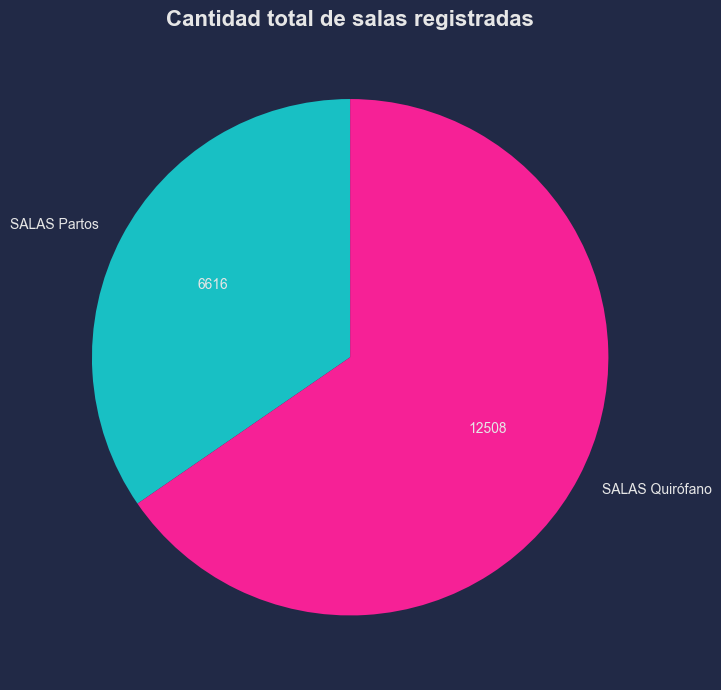

In [53]:
#Se suma toda la cantidad de camas
total_salas = suma_salas.sum()
#Se imprime la variable
print(total_salas)
#Se grafica la tabla
fig, ax=plt.subplots(figsize=(10, 7))
ax.pie(total_salas, labels=total_salas.index,  autopct=lambda p: '{:.0f}'.format(p * sum(total_salas) / 100), startangle=90)
plt.title('Cantidad total de salas registradas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


El análisis revela una situación preocupante: a pesar de la necesidad crítica de contar con salas de quirófano para atender a ciudadanos en situaciones de emergencia, aún hay departamentos que no registran ninguna sala disponible. Este hallazgo subraya el problema central que hemos estado desarrollando a lo largo del proyecto. Si bien la mayoría de los departamentos disponen de estas salas esenciales, persiste un patrón preocupante en aquellos lugares que carecen de los recursos necesarios para afrontar emergencias médicas.

Por otro lado, en cuanto a las salas de parto, la situación es algo más alentadora. La mayoría de los departamentos cuentan con estos espacios, lo cual contrasta con la escasez observada en otras áreas críticas del sistema de salud. Este aspecto es significativo, dado el papel fundamental de las salas de parto en garantizar la atención adecuada y segura en los nacimientos.

# 8. Conclusion

La revisión de los datos sobre la disponibilidad de recursos médicos en los departamentos de Colombia revela una disparidad preocupante en la distribución de instalaciones críticas. Aunque la mayoría de los departamentos cuentan con salas de quirófano y de parto, indispensables para atender emergencias y procedimientos vitales, existen regiones que carecen completamente de estas instalaciones, lo que acentúa la vulnerabilidad en ciertas áreas del país.

En particular, hemos identificado un patrón persistente en departamentos como Guainía, Vaupés, y Vichada, donde la ausencia de camas de cuidados intensivos, quirófanos, y otras instalaciones esenciales subraya una carencia alarmante de infraestructura médica. Esto plantea un riesgo significativo para la población en situaciones críticas y requiere una intervención urgente para garantizar que todos los ciudadanos tengan acceso a la atención médica que merecen.

Además, aunque la disponibilidad de salas de parto es más uniforme, la disminución en el número de estas y otras instalaciones a lo largo del tiempo sugiere que los datos pueden no reflejar toda la capacidad existente. Es crucial profundizar en este análisis para entender las razones detrás de esta aparente reducción y asegurarse de que la información sea completa y precisa.

En conclusión, estos hallazgos refuerzan la necesidad de mejorar la distribución y registro de los recursos médicos en Colombia, con un enfoque especial en los departamentos más desatendidos. Es imperativo que se tomen medidas para equilibrar las disparidades actuales y garantizar que todas las regiones estén preparadas para enfrentar emergencias médicas con los recursos adecuados. 